데이터 명세
- KCI API 국내연구문헌 데이터
- 검색키워드 : 박완서
- 출판연도 : 2008 ~ 2023
- 출판저널 : 주요 인문학 저널
- 출판물유형 : 학술지



추출 데이터
- 특정주제별 키워드가 포함된 출판물
    - 노인 : ['노년', '노인', '늙음', '나이듦', '나이 듦', '나이', '고령', '치매']
    - 전쟁 : ['분단', '북한', '6.25', '전쟁', '남한']
    - 젠더 : ['젠더', '여성', '결혼', '이혼', '남녀차별', '남아선호', '페미']
    - 가족 : ['가족', '엄마', '아빠', '오빠', '언니', '어머니', '아버지', '모성']
    - 근대 : ['근대', '도시', '중산', '물질']

In [ ]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
DATA_PATH = '/content/drive/MyDrive/ 경로입력 /'

In [ ]:
refer_data = pd.read_excel(DATA_PATH + '한국현대문학_인문_복합학_추가데이터_참고문헌_박완서.xlsx', sheet_name = '필터링')

In [ ]:
basic_data = pd.read_excel(DATA_PATH + '박완서_논문기본정보.xlsx')

In [ ]:
basic_data.columns

Index(['article-id', 'journal-name', 'publisher-name', 'pubi-year', 'pub-mon',
       'issue', 'article-categories', 'article-regularity',
       'article-title_original', 'article-title_foreign',
       'article-title_english', 'author', 'abstract_original',
       'abstract_english', 'fpage', 'lpage', 'doi', 'citation-count', 'url',
       'verified', 'volume'],
      dtype='object')

In [ ]:
basic_data = basic_data.rename(columns = {'pub-year' : 'pubi-year',
                                          'article-title_original':'title',
                                          'abstract_original':'abstract',})

In [ ]:
basic_data.columns

Index(['article-id', 'journal-name', 'publisher-name', 'pubi-year', 'pub-mon',
       'issue', 'article-categories', 'article-regularity', 'title',
       'article-title_foreign', 'article-title_english', 'author', 'abstract',
       'abstract_english', 'fpage', 'lpage', 'doi', 'citation-count', 'url',
       'verified', 'volume'],
      dtype='object')

In [ ]:
refer_data.columns

Index(['refebibl-id', 'type-code', 'type-name', 'title', 'author',
       'journal-name', 'pubi-year', 'volume', 'isseue', 'page', 'pubilisher',
       'doi', 'arti-id', 'artiId', 'modern_liter'],
      dtype='object')

In [ ]:
#데이터 결합
data = pd.concat([basic_data[['pubi-year', 'title', 'abstract']], refer_data[['title', 'pubi-year']]])

In [ ]:
data

,pubi-year,title,abstract
0,2010,박완서 노년소설의 젠더시학,본고는 박완서의 전 시기에 걸친 단편을 대상으로 노년소설에 나타난 노인의 젠더변주를...
1,2006,박완서 자전소설의 서술 전략,NaN
2,2011,박완서 소설의 오빠 표상 연구,이 글은 박완서 소설 전체를 대상으로 하여 오빠가 표상되는 방식의 변화양상과 그것이...
3,2014,박완서 소설의 치유 공간 연구,This study set out to examine the issues of sp...
4,2003,박완서의 두 겹의 글쓰기,NaN
...,...,...,...
1153,2022,박완서 문학과 ‘개성(開城)’의 로컬리티,NaN
1154,2022,하드보일드 소설 관습의 수용과 변용 : 양귀자의 『나는 소망한다 내게 금지된 것을』...,NaN
1155,2022,『82년생 김지영』(2016)과 겹쳐 읽은 『무소의 뿔처럼 혼자서 가라』(1993)...,NaN
1156,2022,1990년대 포르노그래피 장르화를 둘러싼 페미니스트들의 정동과 그 의미,NaN


### 데이터처리

#### 노인 데이터 필터링

In [ ]:
senior_keywords = ['노년', '노인', '늙음', '나이듦', '나이 듦', '나이', '고령', '치매']

In [ ]:
# title 열 값들 중 "노년" 문자열 포함여부 반환
c1 = data['title'].str.contains('|'.join(senior_keywords))
c2 = data['abstract'].str.contains('|'.join(senior_keywords))

data['senior'] = c1 | c2

In [ ]:
data

,pubi-year,title,abstract,senior
0,2010,박완서 노년소설의 젠더시학,본고는 박완서의 전 시기에 걸친 단편을 대상으로 노년소설에 나타난 노인의 젠더변주를...,True
1,2006,박완서 자전소설의 서술 전략,NaN,False
2,2011,박완서 소설의 오빠 표상 연구,이 글은 박완서 소설 전체를 대상으로 하여 오빠가 표상되는 방식의 변화양상과 그것이...,False
3,2014,박완서 소설의 치유 공간 연구,This study set out to examine the issues of sp...,False
4,2003,박완서의 두 겹의 글쓰기,NaN,False
...,...,...,...,...
1153,2022,박완서 문학과 ‘개성(開城)’의 로컬리티,NaN,False
1154,2022,하드보일드 소설 관습의 수용과 변용 : 양귀자의 『나는 소망한다 내게 금지된 것을』...,NaN,False
1155,2022,『82년생 김지영』(2016)과 겹쳐 읽은 『무소의 뿔처럼 혼자서 가라』(1993)...,NaN,False
1156,2022,1990년대 포르노그래피 장르화를 둘러싼 페미니스트들의 정동과 그 의미,NaN,False


#### 전쟁 데이터 필터링

In [ ]:
war_keywords = ['분단', '북한', '6.25', '전쟁', '남한']

c1 = data['title'].str.contains('|'.join(war_keywords))
c2 = data['abstract'].str.contains('|'.join(war_keywords))

data['war'] = c1 | c2

#### 젠더 데이터 필터링

In [ ]:
gender_keywords = ['젠더', '여성', '결혼', '이혼', '남녀차별', '남아선호', '페미']

c1 = data['title'].str.contains('|'.join(gender_keywords))
c2 = data['abstract'].str.contains('|'.join(gender_keywords))

data['gender'] = c1 | c2

#### 가족 데이터 필터링

In [ ]:
family_keywords = ['가족', '엄마', '아빠', '오빠', '언니', '어머니', '아버지', '모성']

c1 = data['title'].str.contains('|'.join(family_keywords))
c2 = data['abstract'].str.contains('|'.join(family_keywords))

data['family'] = c1 | c2

#### 근대 데이터 필터링

In [ ]:
recent_keywords = ['근대', '도시', '중산', '물질']

c1 = data['title'].str.contains('|'.join(recent_keywords))
c2 = data['abstract'].str.contains('|'.join(recent_keywords))

data['recent'] = c1 | c2

### 데이터 시각화

#### 연도별 "박완서" 활용된 논문의 빈도

In [ ]:
# temp = pd.concat([basic_data['pub-year'], data['pubi-year']]).reset_index()
# temp.columns = ['index', 'pub-year']
# temp['pub-year'] = temp['pub-year'].astype(int)

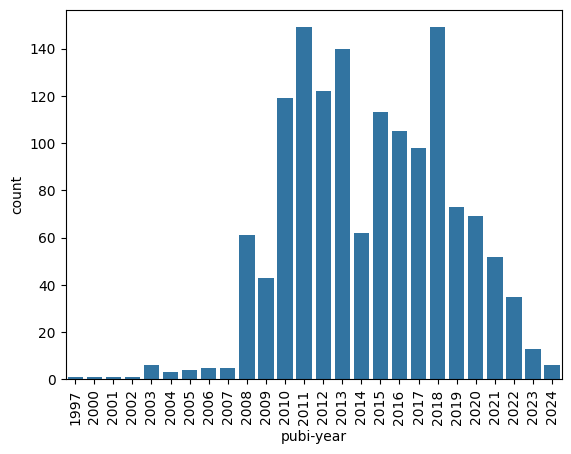

In [ ]:
# 데이터 빈도 시각화 - 참고문헌 데이터의 중복값 포함
sns.countplot(data = data, x = 'pubi-year')
plt.xticks(rotation = 90);

In [ ]:
data_drop_dup = data.drop_duplicates(subset = ['title', 'pubi-year']) # 논문제목과 연도가 중복된 데이터 제거

In [ ]:
# temp = pd.concat([basic_data['pub-year'], data_drop_dup['pubi-year']]).reset_index()
# temp.columns = ['index', 'pub-year']
# temp['pub-year'] = temp['pub-year'].astype(int)
data_drop_dup = data_drop_dup[(data_drop_dup['pubi-year'] >= 2008) & (data_drop_dup['pubi-year'] < 2024)]

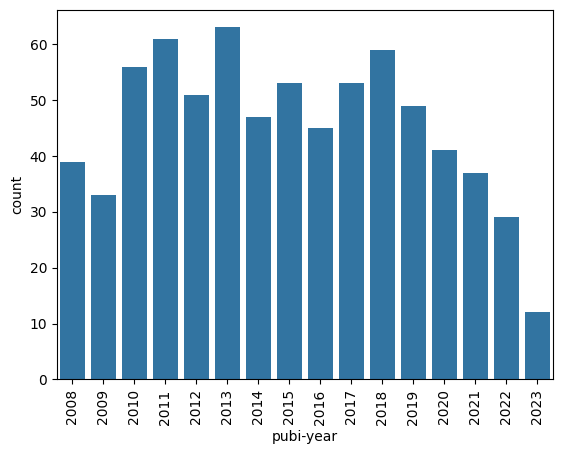

In [ ]:
# 데이터 빈도 시각화 - 참고문헌 데이터의 중복값 제거
sns.countplot(data = data_drop_dup, x = 'pubi-year')
plt.xticks(rotation = 90);

#### 키워드별 연도별 빈도 시각화

In [ ]:
data

,pubi-year,title,abstract,senior,war,gender,family,recent
0,2010,박완서 노년소설의 젠더시학,본고는 박완서의 전 시기에 걸친 단편을 대상으로 노년소설에 나타난 노인의 젠더변주를...,True,False,True,False,False
1,2006,박완서 자전소설의 서술 전략,NaN,False,False,False,False,False
2,2011,박완서 소설의 오빠 표상 연구,이 글은 박완서 소설 전체를 대상으로 하여 오빠가 표상되는 방식의 변화양상과 그것이...,False,True,False,True,False
3,2014,박완서 소설의 치유 공간 연구,This study set out to examine the issues of sp...,False,False,False,False,False
4,2003,박완서의 두 겹의 글쓰기,NaN,False,False,False,False,False
...,...,...,...,...,...,...,...,...
1153,2022,박완서 문학과 ‘개성(開城)’의 로컬리티,NaN,False,False,False,False,False
1154,2022,하드보일드 소설 관습의 수용과 변용 : 양귀자의 『나는 소망한다 내게 금지된 것을』...,NaN,False,False,False,False,False
1155,2022,『82년생 김지영』(2016)과 겹쳐 읽은 『무소의 뿔처럼 혼자서 가라』(1993)...,NaN,False,False,True,False,False
1156,2022,1990년대 포르노그래피 장르화를 둘러싼 페미니스트들의 정동과 그 의미,NaN,False,False,True,False,False


In [ ]:
g = data.groupby(['pubi-year'])[['war', 'senior', 'gender', 'family', 'recent']].sum()
g = g.loc[2008:2023]

In [ ]:
g

,war,senior,gender,family,recent
pubi-year,,,,,
2008,3,16,12,5,5
2009,1,6,9,2,5
2010,4,30,40,11,26
2011,9,3,29,16,38
2012,9,23,39,8,18
2013,19,18,35,5,19
2014,3,6,9,5,6
2015,5,27,12,12,10
2016,4,15,48,8,16


In [ ]:
len(basic_data)

278

In [ ]:
len(refer_data)

1158

In [ ]:
g_melted = g.reset_index().melt(id_vars = 'pubi-year', value_vars = ['war', 'senior', 'gender', 'family', 'recent'])

<Axes: xlabel='pubi-year'>

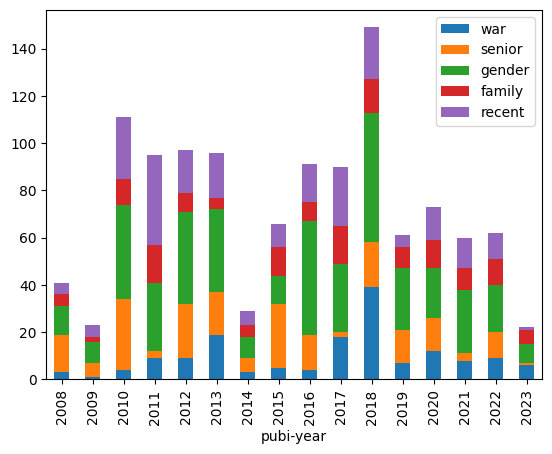

In [ ]:
g.plot(kind = 'bar', stacked = True)

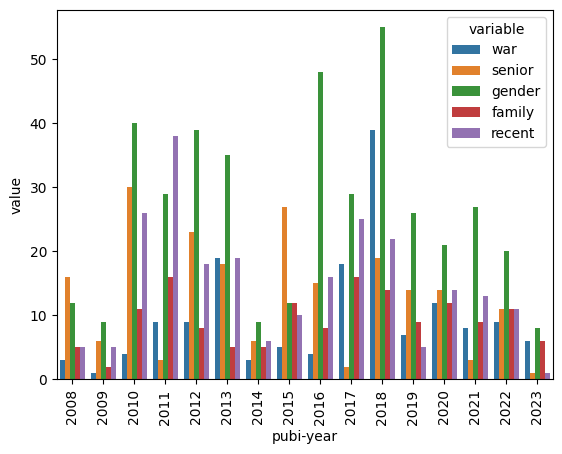

In [ ]:
sns.barplot(data = g_melted, x = 'pubi-year', y = 'value', hue = 'variable')
plt.xticks(rotation = 90);

In [ ]:
g_melted

,pubi-year,variable,value
0,2008,war,3
1,2009,war,1
2,2010,war,4
3,2011,war,9
4,2012,war,9
...,...,...,...
75,2019,recent,5
76,2020,recent,14
77,2021,recent,13
78,2022,recent,11
